In [1]:
from scipy.io import loadmat

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [7]:
df = pd.read_csv('required_data.csv', index_col=0)
df

,Dx,filepath
0,164889003,./training/cpsc_2018/g1/A0003.hea
1,164889003,./training/cpsc_2018/g1/A0004.hea
2,164889003,./training/cpsc_2018/g1/A0007.hea
3,164889003,./training/cpsc_2018/g1/A0009.hea
4,164889003,./training/cpsc_2018/g1/A0017.hea
...,...,...
7589,426627000,./training/st_petersburg_incart/g1/I0058.hea
7590,426627000,./training/st_petersburg_incart/g1/I0061.hea
7591,426627000,./training/st_petersburg_incart/g1/I0069.hea
7592,426627000,./training/st_petersburg_incart/g1/I0073.hea


In [11]:
df['filepath'] = df['filepath'].apply(lambda x: x[:x.index(".hea")])

In [15]:
sample = df['filepath'].sample()
sample.iloc[0]

'./training/georgia/g10/E09015'

In [16]:
signal = loadmat(sample.iloc[0])

In [17]:
signal

{'val': array([[ 58,  58,  58, ...,  -4,  -9,  -9],
        [117, 117, 117, ...,  -9, -14, -24],
        [ 58,  58,  58, ...,  -4,  -4, -14],
        ...,
        [146, 146, 146, ...,  14,  14,   9],
        [ 39,  39,  39, ..., -58, -58, -68],
        [  0,   0,   0, ..., -24, -34, -39]], dtype=int16)}

In [32]:
signal['val'][:3]

array([[ 58,  58,  58, ...,  -4,  -9,  -9],
       [117, 117, 117, ...,  -9, -14, -24],
       [ 58,  58,  58, ...,  -4,  -4, -14]], dtype=int16)

In [33]:
np.save("sample signal.npy",signal['val'][:3])

In [34]:
np.load("sample signal.npy")

array([[ 58,  58,  58, ...,  -4,  -9,  -9],
       [117, 117, 117, ...,  -9, -14, -24],
       [ 58,  58,  58, ...,  -4,  -4, -14]], dtype=int16)

In [24]:
normal_df = pd.read_csv('normal_data.csv', index_col=0)
normal_df

,Dx,filepath
0,426783006,./training/cpsc_2018/g1/A0002.hea
1,426783006,./training/cpsc_2018/g1/A0016.hea
2,426783006,./training/cpsc_2018/g1/A0020.hea
3,426783006,./training/cpsc_2018/g1/A0029.hea
4,426783006,./training/cpsc_2018/g1/A0030.hea
...,...,...
20841,426783006,./training/ptb-xl/g9/HR08994.hea
20842,426783006,./training/ptb-xl/g9/HR08995.hea
20843,426783006,./training/ptb-xl/g9/HR08996.hea
20844,426783006,./training/ptb-xl/g9/HR08997.hea


In [25]:
normal_df = shuffle(normal_df)

In [28]:
req_norm = normal_df.iloc[:5000]

In [29]:
req_norm['filepath'] = req_norm['filepath'].apply(lambda x: x[:x.index(".hea")])

C:\Users\razan\AppData\Local\Temp\ipykernel_11860\3633578257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_norm['filepath'] = req_norm['filepath'].apply(lambda x: x[:x.index(".hea")])


In [30]:
req_norm

,Dx,filepath
20139,426783006,./training/ptb-xl/g9/HR08138
4405,426783006,./training/ptb-xl/g10/HR09896
18358,426783006,./training/ptb-xl/g6/HR05986
2322,426783006,./training/georgia/g8/E07703
16026,426783006,./training/ptb-xl/g4/HR03223
...,...,...
14009,426783006,./training/ptb-xl/g21/HR20593
19557,426783006,./training/ptb-xl/g8/HR07439
4797,426783006,./training/ptb-xl/g11/HR10358
18438,426783006,./training/ptb-xl/g7/HR06077


In [20]:
# initial cleaning...
# sinus rhythm,426783006,NSR
# atrial fibrillation,164889003,AF
# atrial fibrillation and flutter,195080001,AFAFL
# atrial flutter,164890007,AFL
# sinus arrhythmia,427393009,SA
# bradycardia,426627000,Brady
# 1st degree av block,270492004,IAVB
disease_codes = {
    '164889003' : "atrial fibrillation",
    '195080001' : "atrial fibrillation and flutter",
    '164890007' : "atrial flutter",
    '427393009' : "sinus arrhythmia",
    '426627000' : "bradycardia",
    '270492004' : "1st degree av block",
    '426783006' : "sinus rhythm",
}

In [46]:
samp = './training/georgia/g10/E09015'
def filename_generator(filepath):
    temp = filepath.split('/')
#     new_name = f'{temp[2]}-{temp[4]}.npy'
    new_name = f'normal-{temp[4]}.npy'
    return new_name
filename_generator(samp)

'normal-E09015.npy'

In [47]:
def read_reduce(mat_file):
    sig = loadmat(mat_file)
    new_sig = sig['val'][:3]
    file_name = filename_generator(mat_file)
    np.save(f'small_data/{file_name}', new_sig)
read_reduce(samp)

In [40]:
df['filepath'].apply(lambda x: read_reduce(x))

0       None
1       None
2       None
3       None
4       None
        ... 
7589    None
7590    None
7591    None
7592    None
7593    None
Name: filepath, Length: 7594, dtype: object

In [43]:
df['filepath'] = df['filepath'].apply(lambda x: filename_generator(x))

In [45]:
df.to_csv("new_diseases_data.csv")

In [48]:
req_norm['filepath'].apply(lambda x: read_reduce(x))

20139    None
4405     None
18358    None
2322     None
16026    None
         ... 
14009    None
19557    None
4797     None
18438    None
19400    None
Name: filepath, Length: 5000, dtype: object

In [49]:
req_norm['filepath'] = req_norm['filepath'].apply(lambda x: filename_generator(x))

C:\Users\razan\AppData\Local\Temp\ipykernel_11860\3132607196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_norm['filepath'] = req_norm['filepath'].apply(lambda x: filename_generator(x))


In [51]:
req_norm.to_csv('new_normal_data.csv')

In [59]:
df['Dx'].value_counts()

164889003    3475
270492004    2291
427393009    1237
426627000     284
164890007     282
195080001      25
Name: Dx, dtype: int64

In [54]:
req_norm['Dx'].value_counts()

426783006    5000
Name: Dx, dtype: int64

In [95]:
def plot_graph(signal, title="Unknown"):
    plt.figure(figsize=(10, 10))
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.title(f"{title} Lead {i+1}")
        plt.plot(signal[i][:1000])

In [104]:
# disease visualizer
def disease_viz(code, title="Unknown", df=df):
    sample = df[df['Dx'] == code].sample()
    sig = np.load(f"small_data/{sample['filepath'].iloc[0]}")
    plot_graph(sig, title)

In [105]:
disease_codes

{'164889003': 'atrial fibrillation',
 '195080001': 'atrial fibrillation and flutter',
 '164890007': 'atrial flutter',
 '427393009': 'sinus arrhythmia',
 '426627000': 'bradycardia',
 '270492004': '1st degree av block',
 '426783006': 'sinus rhythm'}

# Visualizing Atrial Fibrillation

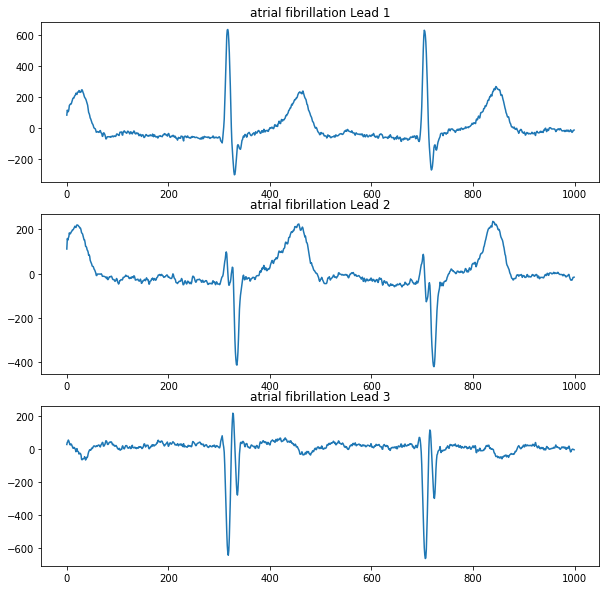

In [106]:
disease_viz(164889003, 'atrial fibrillation')

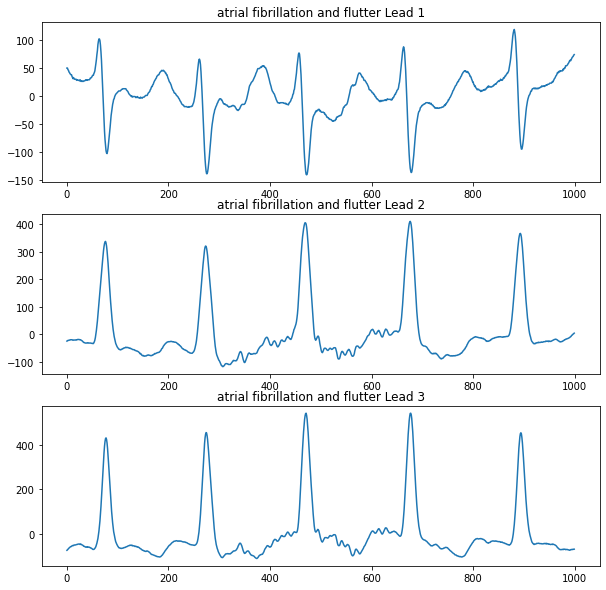

In [107]:
disease_viz(195080001, 'atrial fibrillation and flutter')

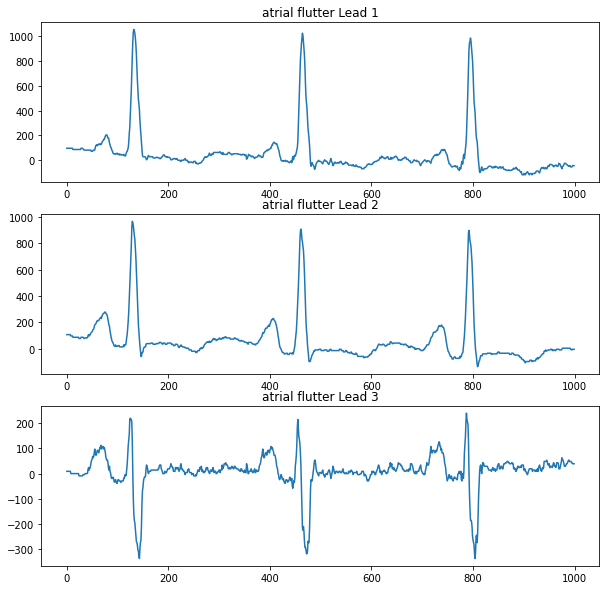

In [108]:
disease_viz(164890007, 'atrial flutter')

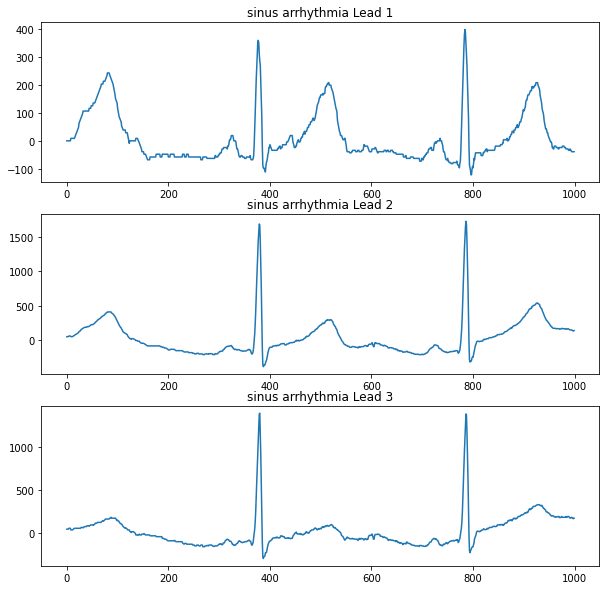

In [109]:
disease_viz(427393009, 'sinus arrhythmia')

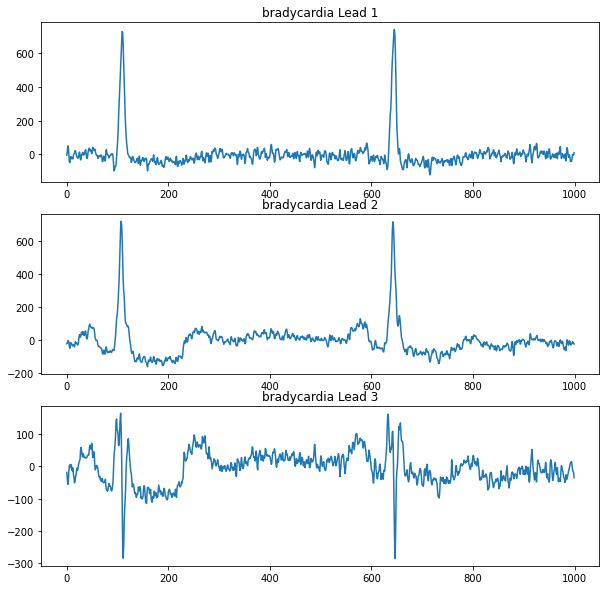

In [110]:
disease_viz(426627000, 'bradycardia')

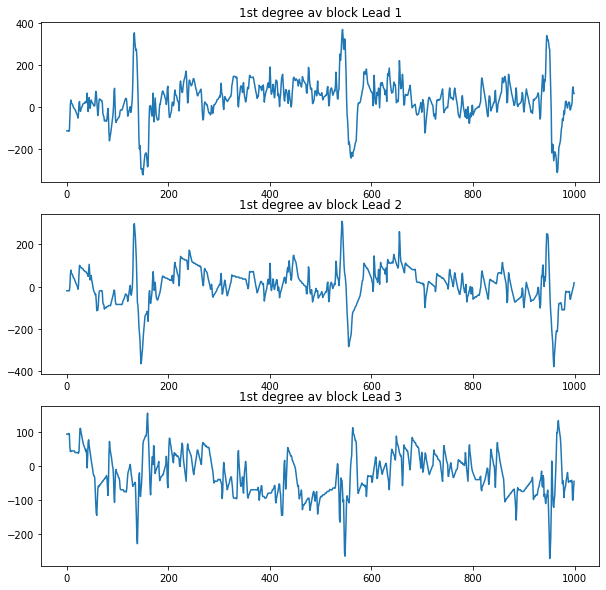

In [111]:
disease_viz(270492004, '1st degree av block')

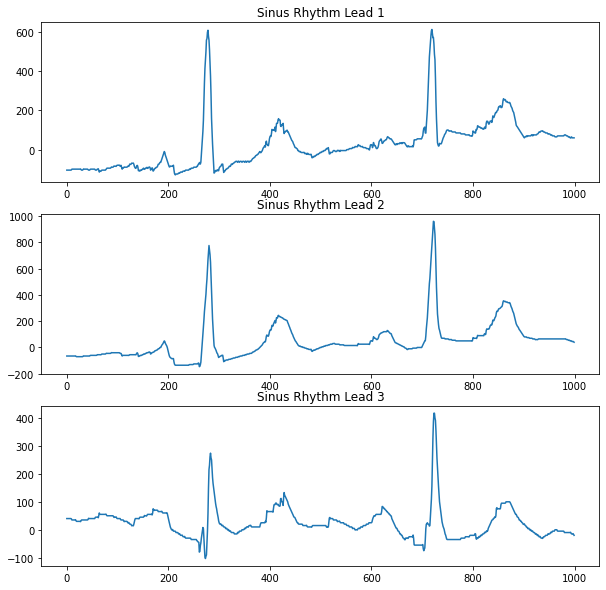

In [112]:
disease_viz(426783006, 'Sinus Rhythm', req_norm)